In [ ]:
2.1 Für welches Daten-Feld möchten Sie Vorhersagen treffen können?
Warscheinlich Score oder Userscore, aber Users und Critics könnte auch eine gute alternative sein. ZB haben high rated games viele benutzer oder nicht etc.

    

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [ ]:
2.2 Bestimmen Sie für jedes Feld einige relevanten statistischen
Informationen wie beispielsweise Median und Standardabweichung.

In [5]:

import pandas as pd

df = pd.read_excel("daten metacritic.xlsx", sheet_name="games-data")

numeric_cols = ['score', 'user score', 'critics', 'users']

df['user score'] = pd.to_numeric(df['user score'], errors='coerce')

stats = {}
for col in numeric_cols:
    stats[col] = {
        'Median': df[col].median(),
        'Standardabweichung': df[col].std(),
        'Mittelwert': df[col].mean(),
        'Min': df[col].min(),
        'Max': df[col].max()
    }

stats_df = pd.DataFrame(stats).T
print(stats_df)

            Median  Standardabweichung  Mittelwert   Min       Max
score         72.0           12.410885   70.386647  11.0      99.0
user score     7.3            1.361018    6.988606   0.2       9.8
critics       17.0           17.152985   23.149799   0.0     126.0
users         28.0         1280.291974  172.797983   0.0  146262.0


In [ ]:
2.3 Erstellen Sie mindestens eine Grafik, beispielsweise ein Histogramm für
eines der Datenfelder oder eine Regression für mehrere Felder.

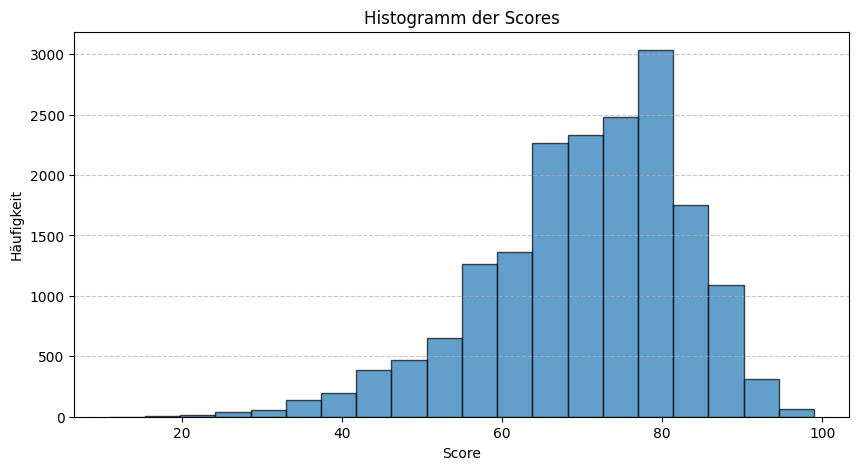

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel-Datei einlesen
df = pd.read_excel("daten metacritic.xlsx", sheet_name="games-data")

# Fehlerhafte/nicht-numerische Werte bereinigen
df['score'] = pd.to_numeric(df['score'], errors='coerce')

# Histogramm erstellen
plt.figure(figsize=(10, 5))
plt.hist(df['score'].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Score")
plt.ylabel("Häufigkeit")
plt.title("Histogramm der Scores")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Diagramm anzeigen
plt.show()


In [ ]:
2.4 Skalieren Sie mindestens ein Datenfeld; oder argumentieren Sie in
weiteren 50 bis 100 Wörtern in Ihrem Notizbuch, warum dies bei Ihrem
Datensatz nicht sinnvoll ist.

In [9]:
import pandas as pd

df = pd.read_excel("daten metacritic.xlsx", sheet_name="games-data")

df["users"] = pd.to_numeric(df["users"], errors="coerce")
df["critics"] = pd.to_numeric(df["critics"], errors="coerce")

df["users_normalized"] = (df["users"] - df["users"].min()) / (df["users"].max() - df["users"].min())
df["critics_normalized"] = (df["critics"] - df["critics"].min()) / (df["critics"].max() - df["critics"].min())

print(df[["users_normalized", "critics_normalized"]].describe())

       users_normalized  critics_normalized
count      17944.000000        17944.000000
mean           0.001181            0.183729
std            0.008753            0.136135
min            0.000000            0.000000
25%            0.000075            0.087302
50%            0.000191            0.134921
75%            0.000615            0.238095
max            1.000000            1.000000
